In [ ]:
import numpy as np
import matplotlib
import imageio
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split

1. Download the Dataset and Understand the Format (10 Points)

In [ ]:
#This cell is responsible for connecting the notebook with my google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Generate the Data Matrix and the Label vector (10 Points)

In [ ]:
def Generate(path, folder_num, image_num, images_total):
#path = "/content/drive/MyDrive/ORL_dataset"
  sub_id = 1
  img_num = 1
  d = np.zeros((0, 10304), int)       #Data Matrix (D) 
  label_y= np.zeros(images_total, int)         #Label Vector (label_y)
  for i in range(folder_num):
          sub_id = i + 1
          for j in range(image_num):
              img_num = j + 1
              #print(path+str(sub_id)+'/'+str(img_num)+'.pgm')
              imgvctr = imageio.imread(path+str(sub_id)+'/'+str(img_num)+'.pgm')
              x=np.array(imgvctr)
              flat = x.flatten()
              d = np.append(d, np.array([flat]), axis=0)
              label_y[i*image_num+j]=sub_id
  print("Data Matrix: 400x10304\n",d)
  print("\nY label vector: \n",label_y)
  return d, label_y  

In [ ]:
d, label_y = Generate("/content/drive/MyDrive/ORL_dataset/s",40,10,400)

Data Matrix: 400x10304
 [[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]

Y label vector: 
 [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 2

3. Split the Dataset into Training and Test sets (10 Points)

In [ ]:
def Split(d, label_y,image_num,even_odd,percentage_test):
  images_total=len(d)
  print(images_total)
  d_train = np.empty((0, 10304), int)
  d_test = np.empty((0, 10304), int)
  y_train = np.array([])
  y_test = np.array([])
  test_subjectimages=0
  for i in range(images_total):
    if (even_odd==1):#If the user wants to split the dataset on even and odd images
      test_subjectimages=5 #images per subject
      if i % 2 == 0:
          d_test = np.append(d_test, [d[i]], axis=0)
          y_test = np.append(y_test, [label_y[i]], axis=0)
      else :
          d_train = np.append(d_train, [d[i]], axis=0)
          y_train = np.append(y_train, [label_y[i]], axis=0)
    else :#if the user wants to split D into any percentage
      count=i%image_num #image num is number of images per subject
      test_subjectimages=percentage_test*image_num
      if (count<percentage_test*image_num):
          #print(count)
          d_train = np.append(d_train, [d[i]], axis=0)
          y_train = np.append(y_train, [label_y[i]], axis=0)
      else:
          d_test = np.append(d_test, [d[i]], axis=0)
          y_test = np.append(y_test, [label_y[i]], axis=0)
  print("Training Dataset: \n",d_train)
  print("Dimensions: ",d_train.shape)
  print("\nTesting Dataset: \n",d_test)
  print("Dimensions: ",d_test.shape)
  return d_test, y_test, d_train, y_train,test_subjectimages

In [ ]:
d_test, y_test, d_train, y_train,test_subjectimages = Split(d,label_y,10,1,0.5)

400
Training Dataset: 
 [[ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 [ 43  50  41 ... 158 153 169]
 ...
 [123 121 126 ...  40  35  42]
 [125 119 124 ...  36  39  40]
 [125 124 124 ...  36  35  34]]
Dimensions:  (200, 10304)

Testing Dataset: 
 [[ 48  49  45 ...  47  46  46]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [128 125 125 ...  85  90  84]
 [129 127 133 ...  93  93  93]
 [119 120 120 ...  89  94  85]]
Dimensions:  (200, 10304)


4. Classification using PCA (30 points)

In [ ]:
def PCA(d_test, y_test, d_train, y_train, images_total):
  mean_vector = np.mean(d_train,axis=0)
  z_train = d_train-mean_vector
  z_test = d_test-mean_vector
  cov = 1/(images_total/2)*np.dot(z_train.T,z_train)
  eigen_values, eigen_vectors = LA.eigh(cov)
  eigen_diag = np.diag(eigen_values)
#A copy before fliping
  eigen_vectors_bff = eigen_vectors
#Gonna have those duplicates in order to save runtime if sth happened i'll have a backup of eigen val and vec
  eigen_vectors_save = eigen_vectors
  eigen_values_save = eigen_values
#sort the array in place in descending order
  eigen_values[::-1].sort() 
  eigen_values_sum = np.sum(eigen_values)
  eigen_vectors = np.flip(eigen_vectors_save,axis=1)
  print("Eigen Values Sum",eigen_values_sum)
  print("Eigen Vectors: \n",eigen_vectors)
  x = 0
  r1 = 0
  r2 = 0
  r3 = 0
  r4 = 0
  sum = 0
  for x in range(np.size(eigen_values,0)):
    sum = sum + eigen_values[x]
  
    if (sum/eigen_values_sum>=0.8 and r1==0):
      r1=x
    elif (sum/eigen_values_sum >= 0.85 and r2==0):
      r2=x
    elif (sum/eigen_values_sum>=0.9 and r3==0):
      r3=x
    elif (sum/eigen_values_sum>=0.95 and r4==0):
      r4=x
      break
#Computing the projection vectors for alpha = 0.8
  print("Number of principle compenents is: ",r1+1)
  projection_U1 = np.zeros((10304,r1+1))
  projection_U1 = eigen_vectors[:,:r1+1]
 # print("Projection Matrix U1: \n",projection_U1)
  projected_data_u1 = np.dot(d_train,projection_U1)
  projected_data_test_u1 = np.dot(d_test,projection_U1)
#Computing the projection vectors for alpha = 0.85
  print("Number of principle compenents is: ",r2+1)
  projection_U2 = np.zeros((10304,r2+1))
  projection_U2 = eigen_vectors[:,:r2+1]
 # print("Projection Matrix U2: \n",projection_U2)
  projected_data_u2 = np.dot(d_train,projection_U2)
  projected_data_test_u2 = np.dot(d_test,projection_U2)
#Computing the projection vectors for alpha = 0.9
  print("Number of principle compenents is: ",r3+1)
  projection_U3 = np.zeros((10304,r3+1))
  projection_U3 = eigen_vectors[:,:r3+1]
 # print("Projection Matrix U3: \n",projection_U3)
  projected_data_u3 = np.dot(d_train,projection_U3)
  projected_data_test_u3 = np.dot(d_test,projection_U3)
#Computing the projection vectors for alpha = 0.95
  print("Number of principle compenents is: ",r4+1)
  projection_U4 = np.zeros((10304,r4+1))
  projection_U4 = eigen_vectors[:,:r4+1]
 # print("Projection Matrix U4: \n",projection_U4)
  projected_data_u4 = np.dot(d_train,projection_U4)
  projected_data_test_u4 = np.dot(d_test,projection_U4)
  return mean_vector, projected_data_u1, projected_data_u2, projected_data_u3, projected_data_u4, projected_data_test_u1, projected_data_test_u2, projected_data_test_u3, projected_data_test_u4

In [ ]:
mean_vector, projected_data_u1, projected_data_u2, projected_data_u3, projected_data_u4, projected_data_test_u1, projected_data_test_u2, projected_data_test_u3, projected_data_test_u4 = PCA(d_test, y_test, d_train, y_train,400)

Eigen Values Sum 15955336.34384999
Eigen Vectors: 
 [[ 0.00124556 -0.01536171 -0.01891079 ...  0.          0.
   0.        ]
 [ 0.00126454 -0.01513146 -0.01911777 ...  0.1092101  -0.51687691
  -0.11110271]
 [ 0.00156465 -0.01516195 -0.01903942 ... -0.10370035 -0.02908354
   0.38728327]
 ...
 [ 0.00873725  0.00961112 -0.01287451 ... -0.01210184  0.01558358
  -0.00664297]
 [ 0.00721705  0.0077597  -0.01377318 ... -0.00614026 -0.00762443
   0.00134965]
 [ 0.0084008   0.00692708 -0.01438815 ... -0.02588449 -0.00739132
  -0.01097345]]
Number of principle compenents is:  37
Number of principle compenents is:  53
Number of principle compenents is:  77
Number of principle compenents is:  116


c. Use a simple classifier (first Nearest Neighbor to determine the class labels). d. Report Accuracy for every value of alpha separately.


In [ ]:
def KNN(n_neighbors, projected_data, projected_data_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(projected_data, y_train)
  y_pred = knn.predict(projected_data_test)
  print(y_pred)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  return metrics.accuracy_score(y_test, y_pred)

In [ ]:
KNN(1,projected_data_u1,projected_data_test_u1, y_train, y_test)
KNN(1,projected_data_u2,projected_data_test_u2, y_train, y_test)
KNN(1,projected_data_u3,projected_data_test_u3, y_train, y_test)
KNN(1,projected_data_u4,projected_data_test_u4, y_train, y_test)

[16.  2.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 38. 11. 11. 11. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 36. 20. 20.  3. 20. 20. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27. 27. 27. 27. 28. 28. 28. 28. 28. 29. 29. 29. 29.
 29. 30. 30. 30. 30. 30. 31. 31. 31. 21. 31. 32. 32. 32.  2. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 40. 15. 35. 35. 35.  7. 36.  7. 36. 36.
 37. 37. 37. 37. 37. 38. 38. 38. 38. 38. 39. 39. 39. 39. 39. 40. 40.  5.
  5.  5.]
Accuracy: 0.93
[16. 19.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  

0.935

6. Classifier Tuning (20 Points) for PCA

Accuracy: 0.935
Accuracy: 0.845
Accuracy: 0.815
Accuracy: 0.74


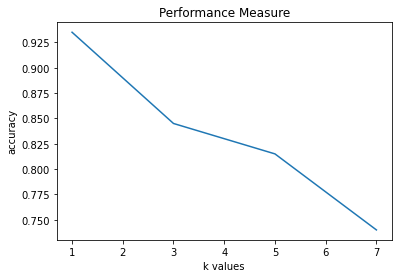

In [ ]:
#for alpha=  0.95
accuracy_arr=np.zeros(4)
k_values=np.array([1,3,5,7])
for i in range(4):
  knn = KNeighborsClassifier(n_neighbors=k_values[i])
  knn.fit(projected_data_u4, y_train)
  y_pred = knn.predict(projected_data_test_u4)
  #print(y_pred)
  accuracy_arr[i]=metrics.accuracy_score(y_test, y_pred)
  print("Accuracy:",accuracy_arr[i])

plt.plot(k_values,accuracy_arr)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title('Performance Measure')
plt.show() 


5. Classification Using LDA (30 Points)

In [ ]:
def LDA(d_test, d_train,test_subjectimages):
  classmeans=np.empty((0, 10304), float)
  subject = np.empty((0, 10304), float)
  z_train = np.empty((0, 10304), float)
  s=np.zeros((10304,10304))#zT.z is a DxD matrix
  sb =np.zeros((10304,10304))
  print(test_subjectimages)
  for i in range (len(d_train)):
    image_no=i+1
    subject=np.append(subject,([d_train[i]]),axis=0)
    #print(image_no%test_subjectimages)
    if(image_no%test_subjectimages==0):#checking if a class is loaded
      print("class")
      #Calculating mean of each class and appending it to classmeans vector
      subject_mean=np.mean(subject,axis=0)
      #subject_mean.reshap
      rows = len(subject_mean)
      # print(subject_mean)
      classmeans = np.append(classmeans, ([subject_mean]),axis=0)
      #subject_mean=classmeans
      #Calculating class scatter
      bracket1=classmeans-mean_vector
      #print((bracket1*bracket1.T).shape)
      sb+=5*np.dot(bracket1.T,bracket1)
      #Centralizing each class (subject)
      z_train=subject-subject_mean
      z_train_trans=np.transpose(z_train)
      #Calculating class scatter matrix
      s+=np.dot(z_train_trans,z_train)
      #Deleting arrays to be used again in loops
      subject = np.empty((0, 10304), float)
      z_train = np.empty((0, 10304), float)
      classmeans=np.empty((0, 10304), float)
      #print(sb)
  sinv=LA.inv(s)
  eigen_values_lda, eigen_vectors_lda = LA.eigh(np.dot(sinv,sb))
  print("Class Mean matrix dimensions")
  print(classmeans.shape)

  print("Between Class scatter Matrix (Sb) dimensions ")
  print(sb.shape)
  print("Within scatter class matrix (s) dimensions")
  print(s.shape)
  #take real values from eigen vectors
  #real values used in eigen vectors (??)
  eigen_vectors_lda_real=eigen_vectors_lda.real
  eigen_values_lda_real=eigen_values_lda.real
  ##id = eigen_values_lda_real.argsort()[::-1]
  #eigen_values_lda_real_sorted = eigen_values_lda_real[id]
  #eigen_vectors_lda_real_sorted = eigen_vectors_lda_real[:,id]
  #print(eigen_vectors_lda_real_sorted)
  #print(eigen_values_lda_real_sorted)
  projection_U39 = np.zeros((10304,39))
  projection_U39 = eigen_vectors_lda_real[:,:39]
  print("Projection Matrix U39: \n",projection_U39)
  projected_data = np.dot(d_train,projection_U39)
  projected_data_test = np.dot(d_test,projection_U39)
  projection_U39.T.shape
  return projected_data, projected_data_test

In [ ]:
projected_data, projected_data_test=LDA(d_test, d_train,test_subjectimages)

5
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
Class Mean matrix dimensions
(0, 10304)
Between Class scatter Matrix (Sb) dimensions 
(10304, 10304)
Within scatter class matrix (s) dimensions
(10304, 10304)
Projection Matrix U39: 
 [[ 0.00568389 -0.00222031  0.02399025 ... -0.00881842  0.03084043
  -0.029262  ]
 [ 0.00577376 -0.00225115  0.02443152 ... -0.00941569  0.03298572
  -0.03235207]
 [ 0.00577556 -0.00231717  0.02426824 ... -0.00955135  0.03398462
  -0.03282301]
 ...
 [-0.01738069 -0.01622185  0.0069088  ...  0.02000747  0.00357514
   0.01119794]
 [ 0.02014294  0.02378041 -0.00023147 ... -0.02360325 -0.00635444
  -0.01957374]
 [ 0.00519431  0.01013622  0.00490487 ... -0.0062135  -0.00513145
  -0.0066143 ]]


c. Use a simple classifier (first Nearest Neighbor to determine the class labels)

In [ ]:
accuracy_arr[0]=KNN(1, projected_data, projected_data_test, y_train, y_test)

[16. 32.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 20. 20.  3. 20. 20. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27. 27. 27. 27. 28. 28. 28. 28. 28. 29. 29. 29. 29.
 29. 30. 30. 30. 30. 30. 31. 31. 31. 21. 31. 32. 32. 32. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 40. 35. 35. 35. 13.  7. 36.  7. 36. 36.
 37. 37. 37. 37. 37. 38. 38. 38. 38. 23. 39. 39. 39. 39. 39. 40. 40. 40.
 40. 35.]
Accuracy: 0.95


6. Classifier Tuning (20 Points) for LDA:

In [ ]:
#number of neighbors = 3
accuracy_arr[1]=KNN(3, projected_data, projected_data_test, y_train, y_test)

[16.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3. 25.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 15. 16.  1. 16. 16.  4.  3.  4. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 11. 20. 20.  3. 20. 20. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 38. 23. 23. 23. 38. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26.  3. 26. 27. 27. 27. 27. 27. 28. 28. 28. 28. 19. 29. 29. 29. 29.
 39. 30. 30. 30. 30. 30. 21. 31. 31. 21. 21. 32. 32. 32. 15. 32. 33. 33.
 33. 33. 20. 34. 34. 34. 34. 34. 40. 15. 13. 35. 13.  7. 36.  7. 36. 36.
 28. 28. 37. 28. 28. 38. 38. 38. 38.  9. 39. 39. 39. 21. 39. 40.  5.  5.
  5.  5.]
Accuracy: 0.825


In [ ]:
#number of neighbors = 5
accuracy_arr[2]=KNN(5, projected_data, projected_data_test, y_train, y_test)

[16.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3. 25.  3.  3.  4.  4.  4.
  4.  4. 40. 40.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 11. 11. 19. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 37. 37. 37. 14. 14. 15. 15.
 15. 35. 15. 15. 16.  1. 16. 16.  4.  3.  4. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 27. 20. 20.  3. 20. 23. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 38. 23. 23. 23. 38. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27. 27. 11. 27. 28. 28. 19. 19. 27. 29. 29. 29. 29.
 33. 30. 30. 30. 30. 30. 21. 31. 31. 21. 21. 32. 32. 32. 15. 32. 33. 33.
 20. 33. 20. 34. 34. 34. 34. 34. 40. 15. 13. 35. 13.  7. 36.  7. 36. 36.
 28. 28. 37. 28. 28. 38. 38. 38. 38. 38. 22. 39. 39. 29. 39. 40.  5. 35.
 35.  5.]
Accuracy: 0.77


In [ ]:
#number of neighbors = 7
accuracy_arr[3]=KNN(7, projected_data, projected_data_test, y_train, y_test)

[16.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3. 25.  3.  3.  4.  4.  4.
  4.  4. 40. 40.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 11. 11. 14. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 37. 37. 37. 14. 14. 15.  2.
 35. 35.  4. 15. 16.  1. 16. 16.  4.  3.  4. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 27. 20. 20.  4. 20.  7. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 38. 23. 23. 38. 38. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 19. 19. 27. 11.  2. 37. 37. 19. 19. 19. 29. 29. 29. 29.
 33. 30. 30. 30. 30. 30. 21. 34. 34. 21. 21. 32. 32. 32.  2. 32. 33. 33.
 20. 33. 20. 34. 34. 34. 34. 34. 40. 15. 13. 12. 13.  7.  7.  7. 36. 36.
 28. 13. 37. 26. 13. 38. 38. 38. 38. 38. 22. 39. 39. 21. 39. 40.  5.  5.
  5.  5.]
Accuracy: 0.705


For one neighbour classification LDA resulted in higher accuracy than PCA. But when the number of neighbours increased, PCA had higher accuracy.

plot the performance measure

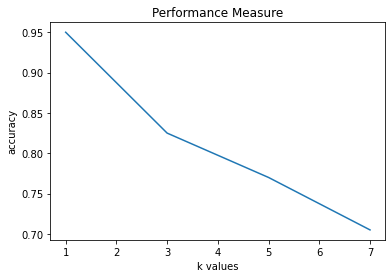

In [ ]:
k_values=np.array([1,3,5,7])
plt.plot(k_values,accuracy_arr)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title('Performance Measure')
plt.show()

Faces vs Non-Faces Using PCA & LDA


In [ ]:
#read non face images and stack them into one matrix
d_nf, label_y_nf = Generate("/content/drive/MyDrive/ORL_dataset1/",2,100,200)
d_test_nf, y_test_nf, d_train_nf, y_train_nf,test_subjectimages_nf=Split(d_nf, label_y_nf,100,1,0)


Data Matrix: 400x10304
 [[ 48  49  45 ...  47  46  46]
 [ 37  35  35 ...  26  28  28]
 [101 106 102 ...  46  50  45]
 ...
 [208 208 207 ...  87  88  89]
 [129 129 129 ... 128 131 114]
 [245 245 245 ...  43  88 174]]

Y label vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
200
Training Dataset: 
 [[ 37  35  35 ...  26  28  28]
 [119 121 119 ...  82  78  80]
 [155 154 154 ... 111 111 108]
 ...
 [131 133 129 ... 131 125 134]
 [208 208 207 ...  87  88  89]
 [245 245 245 ...  43  88 174]]
Dimensions:  (100, 10304)

Testing Dataset: 
 [[ 48  49  45 ...  47  46  46]
 [101 106 102 ...  46  50  45]
 [128 125 126 ...  84  85  85]
 ..

In [ ]:
mean_vector_nf, projected_data_u1_nf, projected_data_u2_nf, projected_data_u3_nf, projected_data_u4_nf, projected_data_test_u1_nf, projected_data_test_u2_nf, projected_data_test_u3_nf, projected_data_test_u4_nf =PCA(d_test_nf, y_test_nf, d_train_nf, y_train_nf,200)

Eigen Values Sum 30649227.839699987
Eigen Vectors: 
 [[ 0.01420317 -0.00522388 -0.00639952 ...  0.          0.
   0.        ]
 [ 0.01407918 -0.00657062 -0.00751674 ... -0.02005954  0.09359116
   0.12074417]
 [ 0.01448543 -0.0070787  -0.0071349  ... -0.09932477 -0.12172617
  -0.64297815]
 ...
 [ 0.00627264  0.00220249 -0.00114366 ... -0.00293362 -0.00663609
   0.00822794]
 [ 0.00703472  0.00084879 -0.00145475 ... -0.01327552 -0.01538016
  -0.00967552]
 [ 0.00740629  0.00115142 -0.00394735 ...  0.01410151  0.00278548
   0.00500862]]
Number of principle compenents is:  28
Number of principle compenents is:  36
Number of principle compenents is:  47
Number of principle compenents is:  63


In [ ]:
KNN(1,projected_data_u1_nf,projected_data_test_u1_nf, y_train_nf, y_test_nf)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]
Accuracy: 0.98


0.98

In [ ]:
projected_data_nf, projected_data_test_nf=LDA(d_test_nf, d_train_nf,test_subjectimages_nf)


5
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
class
Class Mean matrix dimensions
(0, 10304)
Between Class scatter Matrix (Sb) dimensions 
(10304, 10304)
Within scatter class matrix (s) dimensions
(10304, 10304)
Projection Matrix U39: 
 [[ 0.00810628  0.0057462  -0.00102447 ...  0.00970964 -0.02251614
   0.00720078]
 [ 0.0128257   0.00652896  0.00398493 ...  0.01450695 -0.02982288
   0.00271794]
 [ 0.01415379  0.00694421  0.00502938 ...  0.01520197 -0.03213301
   0.00057648]
 ...
 [-0.00023206 -0.00506357  0.00610551 ...  0.00122877  0.00124283
   0.0041221 ]
 [ 0.00131496 -0.00336864  0.00089979 ...  0.00605097  0.00496323
   0.0018005 ]
 [-0.01694784  0.0179622   0.0103194  ...  0.00142827 -0.01058071
   0.00528269]]


In [ ]:
KNN(1, projected_data_nf, projected_data_test_nf, y_train_nf, y_test_nf)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]
Accuracy: 0.97


0.97

In [ ]:
def variable_nf(d_train_nf, y_train_nf,d_test_nf,y_test_nf):
  nf_total=100
  ratio=0.4
  accuracy_arr = np.empty(4,float)
  nf_count_arr = np.empty(0,int)
  nf_count=0
  offset=10
  for i in range(4):
    ratio=0.4-(i*0.1)
    print("ratio is",ratio)
    nf_count=((1-ratio)*nf_total)-50
    X_train, X_rubbish, y_train, y_rubbish = train_test_split(d_train_nf, y_train_nf,test_size=ratio,shuffle=False)
    mean_vector_nf, projected_data_u1_nf, projected_data_u2_nf, projected_data_u3_nf, projected_data_u4_nf, projected_data_test_u1_nf, projected_data_test_u2_nf, projected_data_test_u3_nf, projected_data_test_u4_nf =PCA(d_test_nf, y_test_nf, X_train,X_train,len(X_train)*2)
    accuracy_arr[i]=KNN(1, projected_data_u1_nf, projected_data_test_u1_nf, y_train, y_test_nf)
    print(y_train)
    #nf_count = nf_count + offset
    print(nf_count)
    nf_count_arr = np.append(nf_count_arr, [nf_count], axis=0)
 
  plt.plot(nf_count_arr,accuracy_arr)
  plt.xlabel("Number of Non-Face images")
  plt.ylabel("accuracy")
  plt.title('Performance Measure')
  plt.show()
  print("---------------------------------")
  print(nf_count_arr)

ratio is 0.4
Eigen Values Sum 22379702.391944423
Eigen Vectors: 
 [[ 1.28651633e-02  1.66475401e-02 -1.11467522e-03 ...  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [ 1.28778497e-02  1.57729503e-02 -7.41186403e-04 ...  9.92209082e-03
   3.92850353e-03 -2.74759191e-01]
 [ 1.25133397e-02  1.59708139e-02 -8.57292715e-04 ... -5.11927946e-03
   1.05261300e-01  6.62962280e-01]
 ...
 [ 8.11088077e-03 -9.53319579e-04  3.18551557e-03 ... -2.03367615e-02
  -2.92876072e-03  1.31042987e-03]
 [ 8.45332598e-03 -2.84041105e-04  2.68509993e-03 ...  2.93510758e-03
   1.27406435e-03 -1.13524064e-02]
 [ 8.25298985e-03  2.60019041e-03  2.41989891e-03 ... -8.28444076e-05
   4.52872053e-03  5.80382296e-03]]
Number of principle compenents is:  17
Number of principle compenents is:  21
Number of principle compenents is:  28
Number of principle compenents is:  39
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

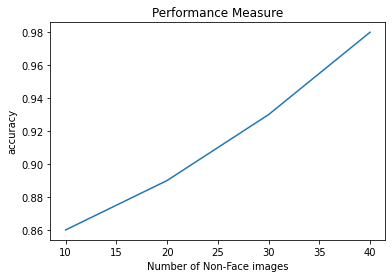

---------------------------------
[10. 20. 30. 40.]


In [ ]:
variable_nf(d_train_nf,y_train_nf,d_test_nf,y_test_nf)

8. Bonus (5 Points)

In [ ]:
d2, label_y2 = Generate("/content/drive/MyDrive/ORL_dataset/s",40,10,400)
d_test2, y_test2, d_train2, y_train2,images_subject2 = Split(d,label_y,10,0,0.7)

Data Matrix: 400x10304
 [[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]

Y label vector: 
 [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 2

In [ ]:
mean_vector2, projected_data2_u1, projected_data2_u2, projected_data2_u3, projected_data2_u4, projected_data2_test_u1, projected_data2_test_u2, projected_data2_test_u3, projected_data2_test_u4 = PCA(d_test2, y_test2, d_train2, y_train2,400)

Eigen Values Sum 22507424.51114285
Eigen Vectors: 
 [[-0.00403871  0.01417196  0.02094656 ... -0.         -0.
   0.        ]
 [-0.00404218  0.01422572  0.02101922 ...  0.44591999 -0.40839392
   0.09080205]
 [-0.00408664  0.01425748  0.0208947  ... -0.0582928   0.1721656
   0.49606992]
 ...
 [-0.00559091 -0.01213822  0.01130253 ...  0.01205837 -0.00243668
   0.00316342]
 [-0.00540221 -0.01148277  0.0117586  ...  0.00156832  0.00550255
   0.00051871]
 [-0.00638071 -0.01021068  0.01254827 ...  0.0057419   0.00474042
   0.00531018]]
Number of principle compenents is:  39
Number of principle compenents is:  57
Number of principle compenents is:  89
Number of principle compenents is:  145


In [ ]:
KNN(1,projected_data2_u1,projected_data2_test_u1, y_train2, y_test2)
KNN(1,projected_data2_u2,projected_data2_test_u2, y_train2, y_test2)
KNN(1,projected_data2_u3,projected_data2_test_u3, y_train2, y_test2)
KNN(1,projected_data2_u4,projected_data2_test_u4, y_train2, y_test2)

[ 1.  1.  1.  2.  2.  2.  3.  3.  3.  4.  4.  4.  5.  5. 40.  6.  6.  6.
  7.  7.  7.  8.  8.  8.  9.  9.  9. 10. 10. 38. 11. 11. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 27. 19. 20. 20. 20. 21. 21. 21. 22. 22. 22. 23. 38. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 37. 28. 28. 29. 29. 29. 30. 30. 30.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 34. 34. 34. 35. 35. 35. 36. 36. 36.
 37. 37. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.]
Accuracy: 0.9583333333333334
[ 1.  1.  1.  2.  2.  2.  3.  3.  3.  4.  4.  4.  5.  5. 40.  6.  6.  6.
  7.  7.  7.  8.  8.  8.  9.  9.  9. 10. 10. 38. 11. 11. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 15. 19. 20. 20. 20. 21. 21. 21. 22. 22. 22. 23. 23. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 37. 28. 28. 29. 29. 29. 30. 30. 30.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 34. 34. 34. 35. 35. 35. 36. 36. 36.
 37. 37. 37. 38. 38. 38. 39. 39. 39. 40. 40. 

0.95

Using 50% split resultied in lower accuracy than using 70% training and 30% testing. 